# Analyze Xenium data 

In [1]:
import squidpy as sq
import spatialdata_plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spatialdata as sd

from pathlib import Path

## Load Xenium data

In [2]:
# xenium_path = Path("./Xenium")
xenium_path = Path("/Users/tim.treis/Downloads/xenium_sdata.zarr")
xenium_sdata = sd.read_zarr(xenium_path)
xenium_sdata

SpatialData object, with associated Zarr store: /Users/tim.treis/Downloads/xenium_sdata.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
│     └── 'morphology_mip': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
│     └── 'nucleus_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (24406, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (24406, 319)
with coordinate systems:
    ▸ 'gl

## Modify Xenium data so that there is a table annotating a label

In [3]:
cells = np.unique(xenium_sdata.labels["cell_labels"]["scale0"].image.compute())
cells = cells[cells != 0]  # background
n_cells = len(cells)

instance_key = "cell_labels"

xenium_sdata.tables["other_table"] = xenium_sdata.tables["table"][:n_cells].copy()
xenium_sdata.tables["other_table"].obs["region"] = "cell_labels"
xenium_sdata.tables["other_table"].obs["region"] = pd.Categorical(
    xenium_sdata.tables["other_table"].obs["region"]
)
xenium_sdata.tables["other_table"].uns["spatialdata_attrs"]["region"] = "cell_labels"
xenium_sdata.tables["other_table"].uns["spatialdata_attrs"][
    "instance_key"
] = instance_key
xenium_sdata.tables["other_table"].obs[instance_key] = [i + 1 for i in range(n_cells)]
xenium_sdata

SpatialData object, with associated Zarr store: /Users/tim.treis/Downloads/xenium_sdata.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
│     └── 'morphology_mip': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
│     └── 'nucleus_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (24406, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
└── Tables
      ├── 'other_table': AnnData (24406, 319)
      └── 'table': AnnData (

## Filter shapes

In [4]:
xenium_sdata.tables["table"].uns["spatialdata_attrs"]

{'instance_key': 'cell_id', 'region': 'cell_circles', 'region_key': 'region'}

In [5]:
xenium_sdata_shapefiltered = sq.pp.filter_cells(
    data=xenium_sdata, table="table", max_counts=550, inplace=False
)
xenium_sdata_shapefiltered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 


WARNING  Filtering labels, this can be slow depending on the resolution.                                           


/Users/tim.treis/Documents/GitHub/spatialdata/src/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/tim.treis/Documents/GitHub/spatialdata/src/spatialdata/_core/_elements.py:105: UserWarning: Key `cell_circles` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
│     └── 'morphology_mip': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
│     └── 'nucleus_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (321, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
└── Tables
      ├── 'other_table': AnnData (24406, 319)
      └── 'table': AnnData (321, 319)
with coordinate systems:
    ▸ 'global', with elements:
        mo

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


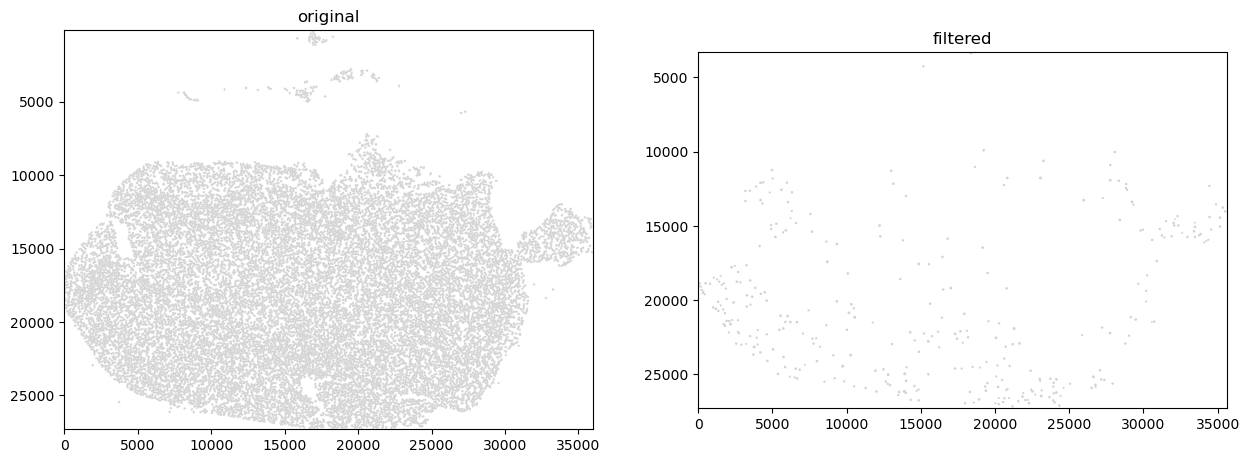

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
xenium_sdata.pl.render_shapes("cell_circles").pl.show(ax=axs[0], title="original")
xenium_sdata_shapefiltered.pl.render_shapes("cell_circles").pl.show(
    ax=axs[1], title="filtered"
)

## Filter labels

In [9]:
xenium_sdata.tables["other_table"].uns["spatialdata_attrs"]

{'instance_key': 'cell_labels',
 'region': 'cell_labels',
 'region_key': 'region'}

In [7]:
xenium_sdata_labelfiltered = sq.pp.filter_cells(
    data=xenium_sdata, table="other_table", max_counts=550, inplace=False
)
xenium_sdata_labelfiltered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 
WARNING  Filtering labels, this can be slow depending on the resolution.                                           


/Users/tim.treis/Documents/GitHub/spatialdata/src/spatialdata/_core/_elements.py:125: UserWarning: Key `other_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
│     └── 'morphology_mip': DataTree[cyx] (1, 27282, 36955), (1, 13641, 18477), (1, 6820, 9238), (1, 3410, 4619), (1, 1705, 2309)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
│     └── 'nucleus_labels': DataTree[yx] (27282, 36955), (13641, 18477), (6820, 9238), (3410, 4619), (1705, 2309)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (24406, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (24406, 1) (2D shapes)
└── Tables
      ├── 'other_table': AnnData (321, 319)
      └── 'table': AnnData (24406, 319)
with coordinate systems:
    ▸ 'global', with elements:
        

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


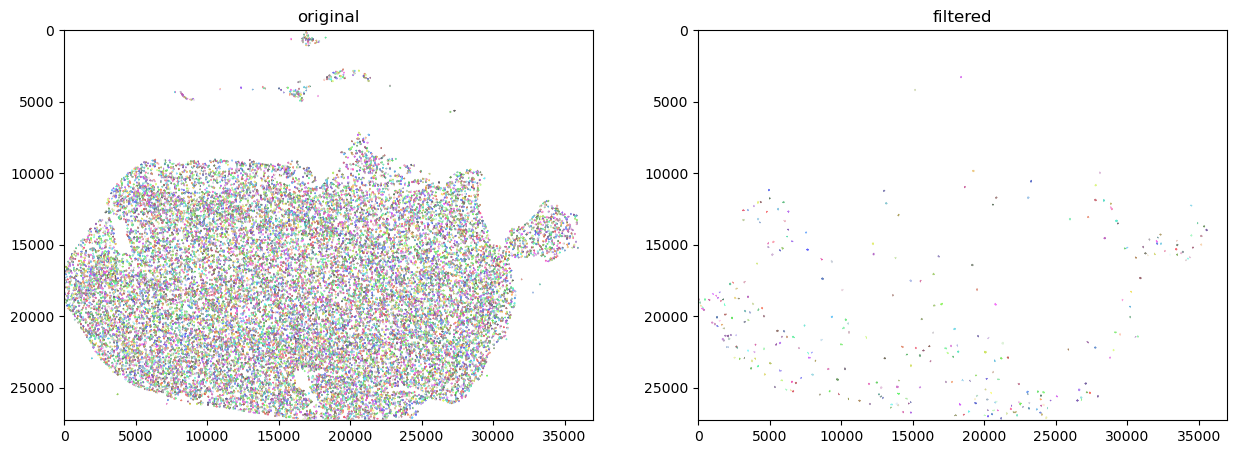

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
xenium_sdata.pl.render_labels("cell_labels").pl.show(ax=axs[0], title="original")
xenium_sdata_labelfiltered.pl.render_labels("cell_labels").pl.show(
    ax=axs[1], title="filtered"
)